# Wine Class Predicition

In this project we will be analysing the winedataset dataset and build a predictive model that can predict the 'Class' of the wine. 

Dataset from : https://github.com/dsrscientist/dataset1

There are 13 independent variables in the dataset. The following are the independent variables of the dataset.

    1. Alcohol
    2. Malic acid
    3. Ash
    4. Alcalinity of ash
    5. Magnesium
    6. Total phenols
    7. Flavanoids
    8. Nonflavanoid phenols
    9. Proanthocyanins
    10.Color intensity
    11.Hue
    12.diluted wines
    13.Proline
    
The target variable is the 'Class' variable in the dataset. The Class variable has three categories in it. Class '1', '2' and '3'. 

Assumption about target classes: Assuming that class 1 is the best and class 3 is the least desired

Problem: Classification problem


### Importing libraries

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy.stats import f_oneway
from scipy.stats import zscore
from numpy import percentile

from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import time


import warnings

warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('./data/winedataset.csv')
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape

(178, 14)

Observation:

There are 178 rows and 14 columns in the dataset

In [4]:
df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines',
       'Proline    '],
      dtype='object')

In [5]:
df.rename(columns={'Malic acid':'malic_acid','Proline    ':'Proline','Alcalinity of ash':'Alcalinity_of_ash',
                  'Total phenols':'Total_phenols', 'Nonflavanoid phenols':'Nonflavanoid_phenols',
                  'Color intensity':'Color_intensity', 'diluted wines':'diluted_wines'},inplace=True)

### Finding Missing values

In [6]:
df.isnull().sum()

Class                   0
Alcohol                 0
malic_acid              0
Ash                     0
Alcalinity_of_ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
diluted_wines           0
Proline                 0
dtype: int64

Observation:

There are no missing values in the dataset. Hence we don't need to handle missing values.

### Datatypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  diluted_wines         178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Observation:

All the variables are continuous variable. Only the 'Class'(target) variable is categorical although is an Integer

### Descriptive statistical analysis

In [8]:
df.describe()

,Class,Alcohol,malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Observations:

1. All the variables seem to be very close to a normal distribution. All the values indicates that we may not need any data cleaning or data transformation.
2. The Proline variable is on a different scale compared to the other variables. Hence the mean seem to be slightly away from the median towards the right side, indicating a right skew. We will investigate this further.
3. The standard deviation also indicates that the 'Proline' variables' spread is wider than the other variables.
4. 'Proline' Variable might also have some slight outliers since the max value is slightly farther than the mean than the min value is. Also there is a bigger gap bewtween the 75% and the max value when compared to other predictors.
5. 'Color intensity' Variable might also have some outliers since there is a gap between the 75th quartile and the max values


We will be further investigating these observations

### Exploratory Data Analysis

#### Univariate Analysis

In [9]:
df.columns

Index(['Class', 'Alcohol', 'malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'diluted_wines',
       'Proline'],
      dtype='object')

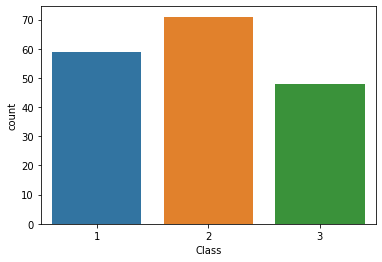

In [10]:
#Investigating the frequency of the different categories in the target variable
sns.countplot(df['Class'])

In [33]:
print('The percentage of Classes in the dataset are\n',round(df['Class'].value_counts(True)*100))

The percentage of Classes in the dataset are
 2    40.0
1    33.0
3    27.0
Name: Class, dtype: float64


Observations:

The classes in the target variable are not unbalanced. Considering the total number of data, we have sufficient amount of data to represent each class.

In [34]:
def dist_plot(data,col):
    plt.title(f'Comparing the distribution of {col} and a Normal Distribution.')
    plt.xlabel(col)
    sns.distplot(data[col], fit=norm)
    plt.show()

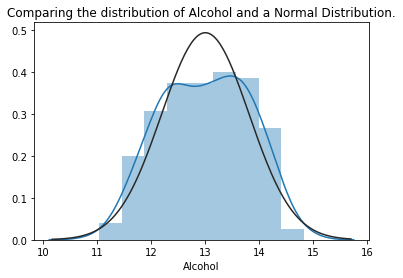

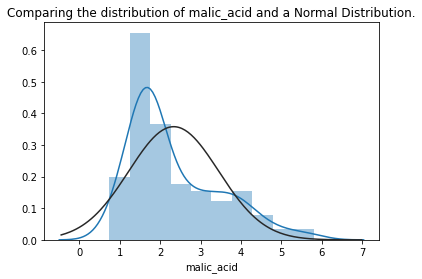

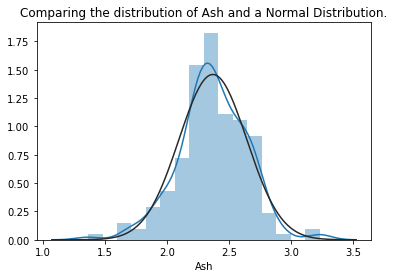

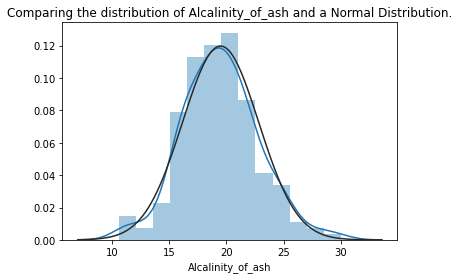

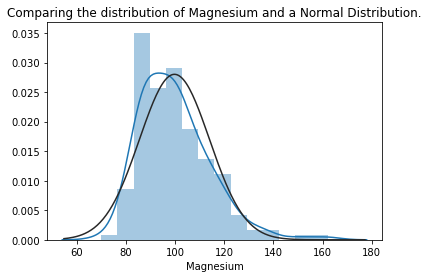

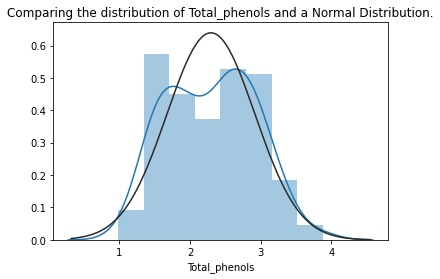

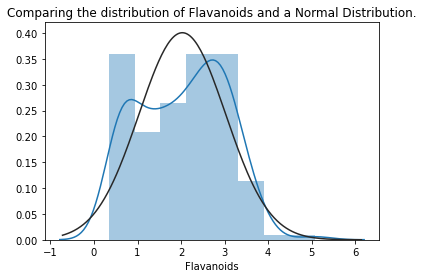

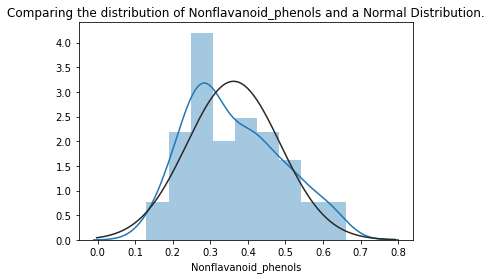

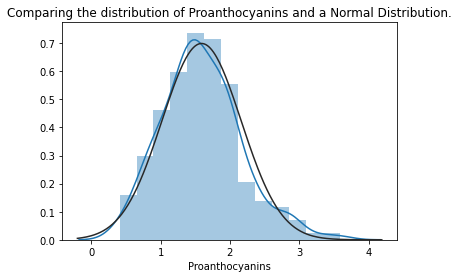

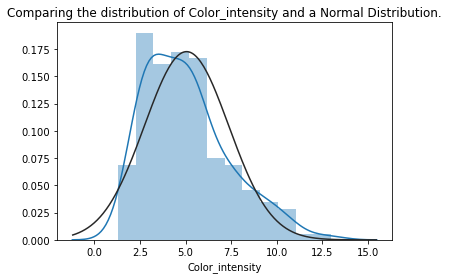

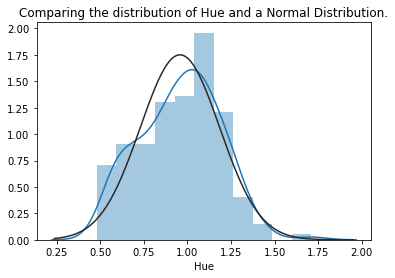

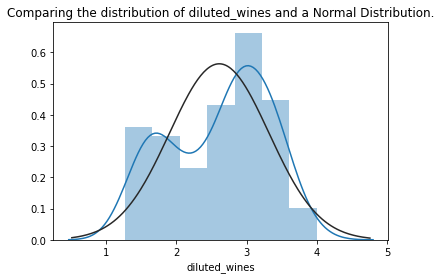

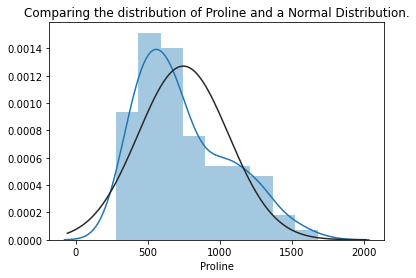

In [35]:

for col in df.drop(['Class'], axis=1).columns:
    dist_plot(df,col)


Observations:

1. We can see that few variables show a slight deviation from a Normal distribution.

Variables visually showing variation from a Normal distribution:
1. malic_acid
2. Magnesium
3. Nonflavanoids_phenols
4. Color_intensity
5. diluted_wines
6. Proline

We may need to treat the skewness for these variables. However lets investigate further to see if the skewness is significant.

Analysing the Skewness

In [36]:
df.skew()

Class                   0.107431
Alcohol                -0.051482
malic_acid              1.039651
Ash                    -0.176699
Alcalinity_of_ash       0.213047
Magnesium               1.098191
Total_phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_phenols    0.450151
Proanthocyanins         0.517137
Color_intensity         0.868585
Hue                     0.021091
diluted_wines          -0.307285
Proline                 0.767822
dtype: float64

Observations:

From the above result we can see that the following varialbes have significant Skewness in their distribution:
1. malic_acid
2. Magnesium
3. Color_intensity
4. Proline
5. Proanthocyanins have a slight skewness.

We can further investigate which class is causing the skewness

### Analysing with respect to the target variable

The following variables showed significant skewness:

malic_acid, Magnesium, Color_intensity, Proline, Proanthocyanins


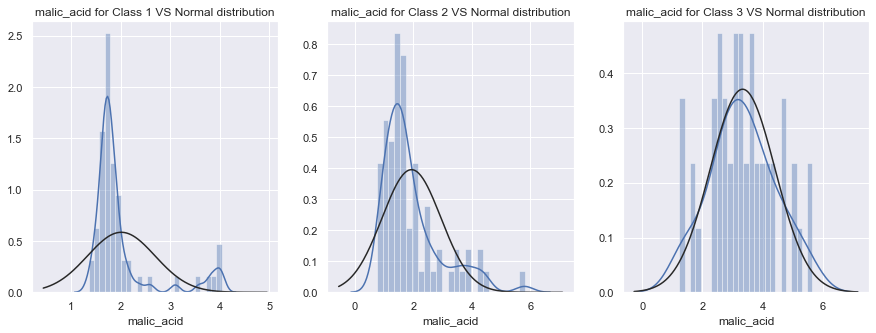

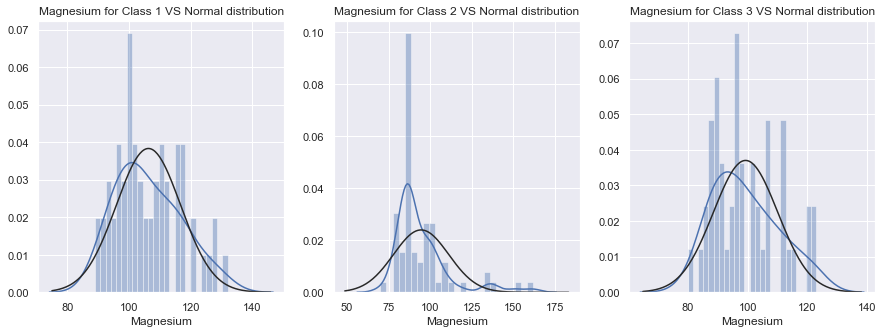

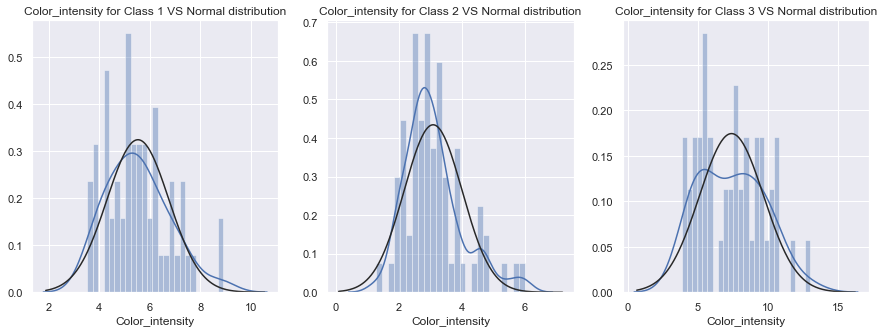

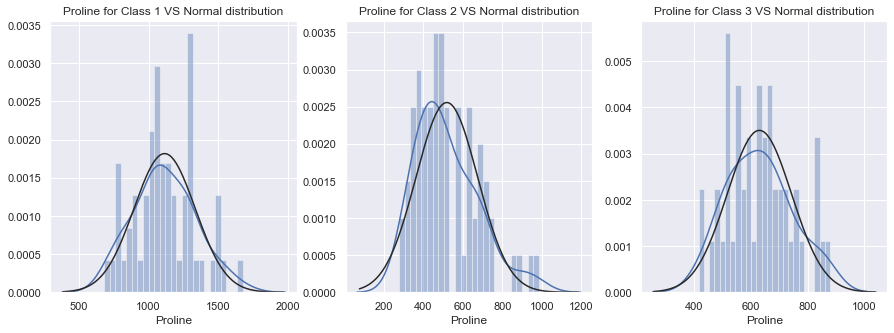

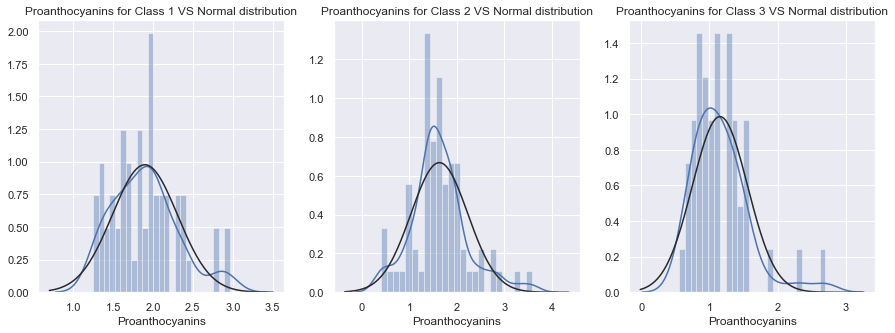

In [37]:
sns.set(rc={"figure.figsize": (15, 5)})
predictors = ['malic_acid','Magnesium','Color_intensity','Proline','Proanthocyanins']
for col in predictors:    
    fig, ax = plt.subplots(1,3)
    for i in df['Class'].unique():
        sns.distplot(df[df['Class']==i][col], bins=25, ax = ax[i-1], fit=norm)
        ax[i-1].set_title(f'{col} for Class {i} VS Normal distribution')

Observations:

From the above graphs we can see that the following classes are causing the skewness in the following dependent variables:
1. malic_acid(Classes 1 and 2), 
2. Magnesium(Classes 2 and 3), 
3. Proanthocyanins(Class 3), 
4. Color_intensity(Classes 2 and 3) and 
5. Proline(Class 2)

We will treat the skewness in the later part of this analysis

# Bivariate analysis

Now lets figure out if the independent variables are able to significantly differentiate between the Different classes in the target variable 'Class'

This will help us understand if the sample dataset we have, really has 3 different classes.

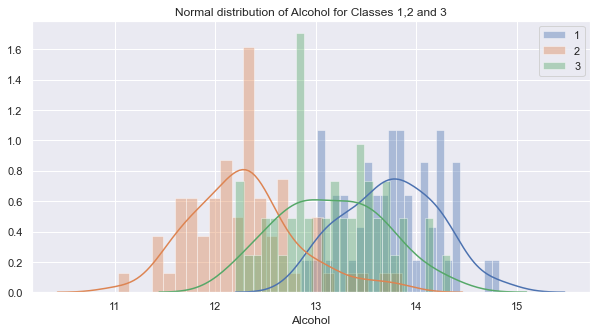

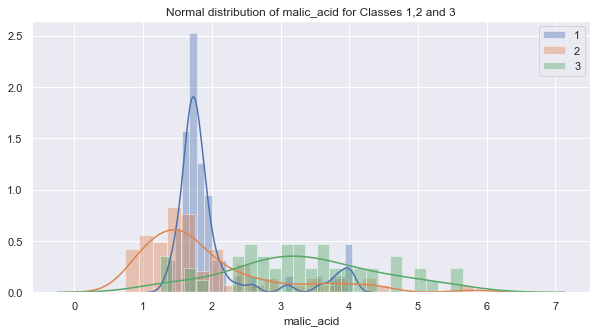

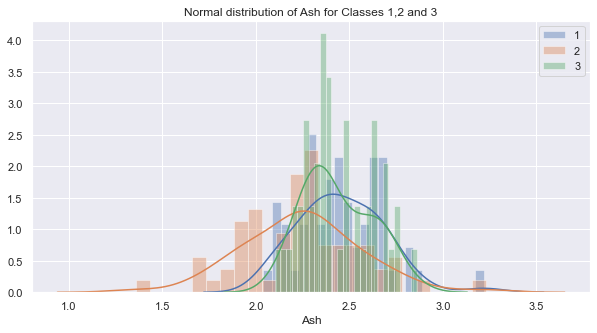

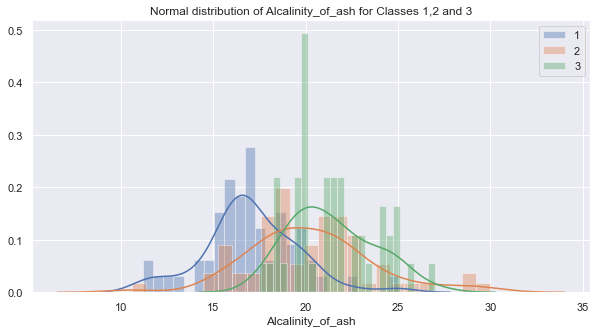

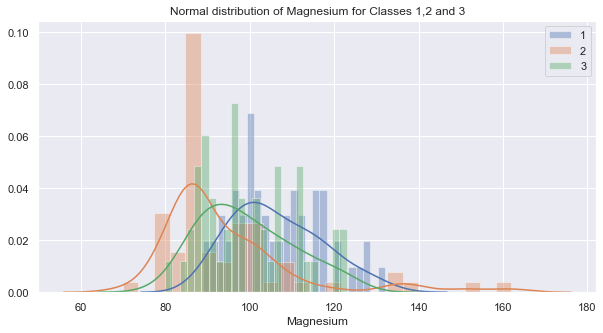

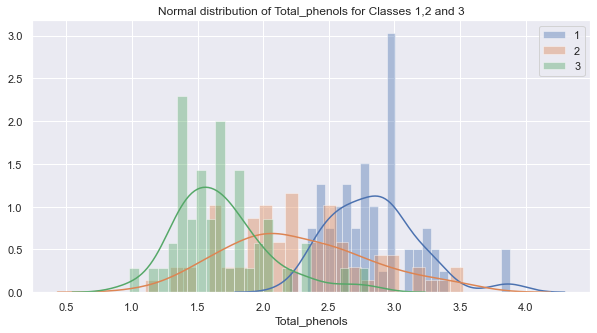

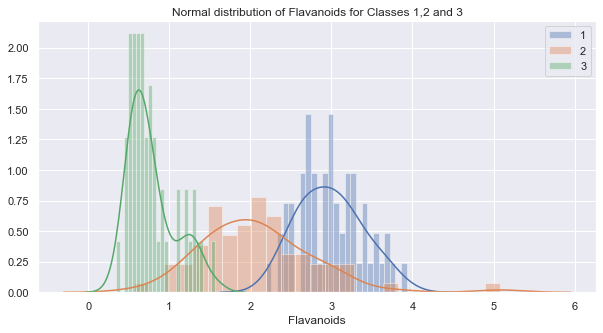

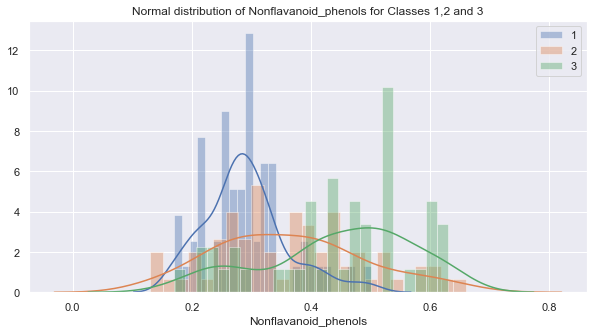

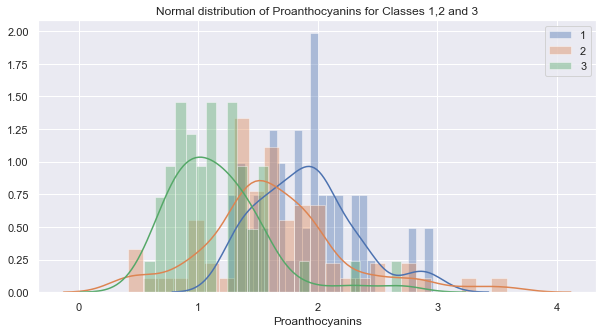

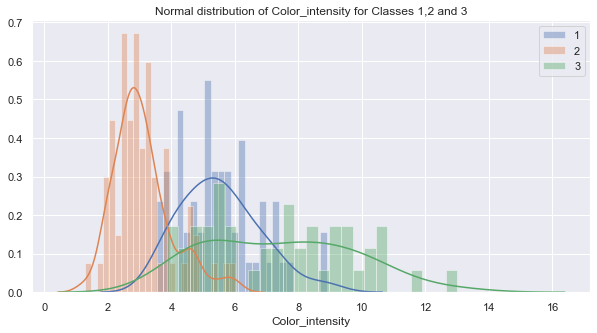

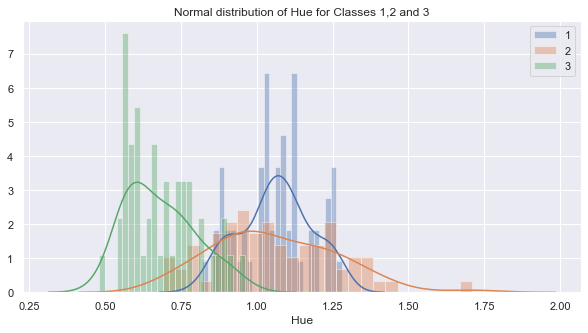

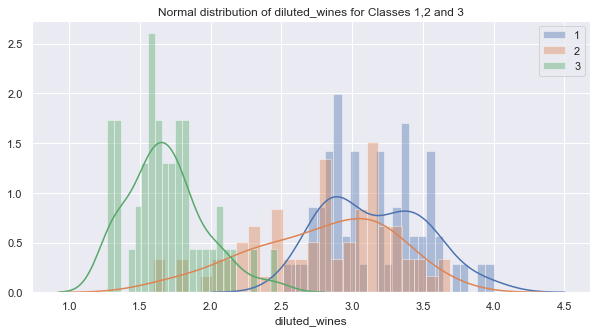

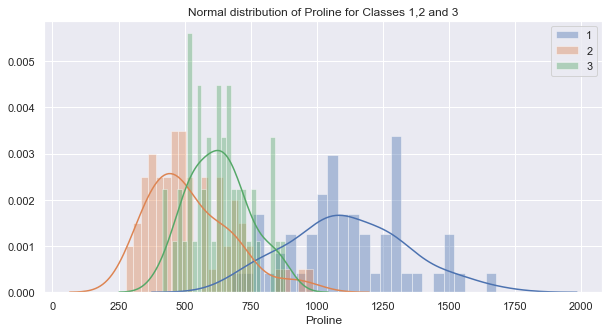

In [136]:
sns.set(rc={"figure.figsize": (10, 5)})

for col in df.drop(['Class'], axis=1).columns:    
    for i in df['Class'].unique():
        plt.title(f'Normal distribution of {col} for Classes 1,2 and 3')
        sns.distplot(df[df['Class']==i][col], bins=25,kde=True)
    plt.legend([1,2,3])
    plt.show()

Observations:

From the above plots, we can say that all three classes are clearly differentiated by each variable. This is a good sign because this indicates our features are able to show difference between the different classes in the target variable

Since there is a clear distinction between the classes even a simple model should be able to pick up the underlying function representing the dataset.

### ANOVA

The variables are useful in a model only if they can clearly distinguish between the different Classes in the target variable. We can test that by doing an ANOVA test.

Lets do an ANOVA test to confirm that all the classes are significantly different from each other.


Hypothesis:

Ho : There is no difference in the means of the samples(Classes 1,2 and 3).

Ha : The means are not all equal between the samples(Classes 1,2 and 3).

In [39]:
for col in df.drop(['Class'], axis=1).columns:    
    f,p = f_oneway(df[df['Class']==1][col],df[df['Class']==2][col],df[df['Class']==3][col])
    if p <= 0.05:
        print(f'The means of Classes 1, 2 and 3 for "{col}" variable are \033[1m significantly different \033[0m.')
    else:
        print(f'The means of Classes 1, 2 and 3 for "{col}" variable are \033[1m Not significantly different \033[0m.')


The means of Classes 1, 2 and 3 for "Alcohol" variable are  significantly different .
The means of Classes 1, 2 and 3 for "malic_acid" variable are  significantly different .
The means of Classes 1, 2 and 3 for "Ash" variable are  significantly different .
The means of Classes 1, 2 and 3 for "Alcalinity_of_ash" variable are  significantly different .
The means of Classes 1, 2 and 3 for "Magnesium" variable are  significantly different .
The means of Classes 1, 2 and 3 for "Total_phenols" variable are  significantly different .
The means of Classes 1, 2 and 3 for "Flavanoids" variable are  significantly different .
The means of Classes 1, 2 and 3 for "Nonflavanoid_phenols" variable are  significantly different .
The means of Classes 1, 2 and 3 for "Proanthocyanins" variable are  significantly different .
The means of Classes 1, 2 and 3 for "Color_intensity" variable are  significantly different .
The means of Classes 1, 2 and 3 for "Hue" variable are  significantly different .
The means

Observation:

The result from the ANOVA test shows that all the variables are able to clearly distinguish between the different classes in our Target variable 'Class'

#### Boxplots

In [40]:
df.columns

Index(['Class', 'Alcohol', 'malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'diluted_wines',
       'Proline'],
      dtype='object')

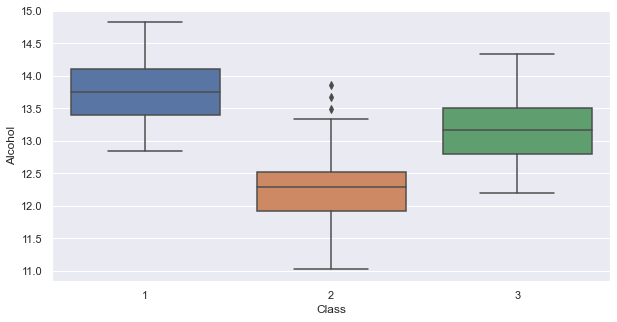

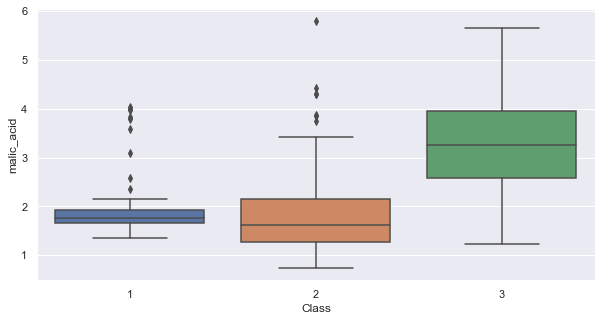

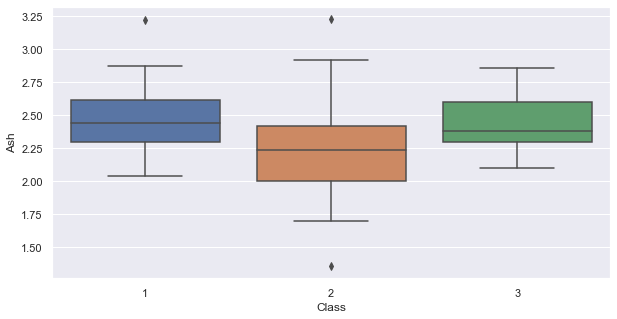

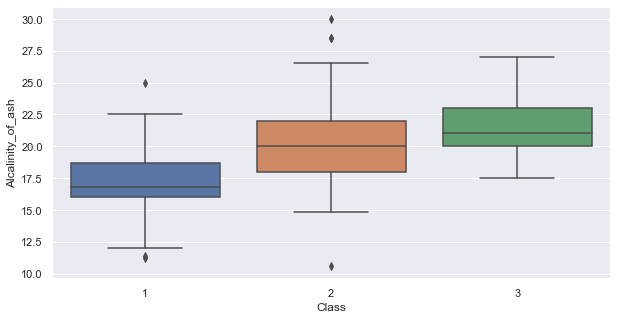

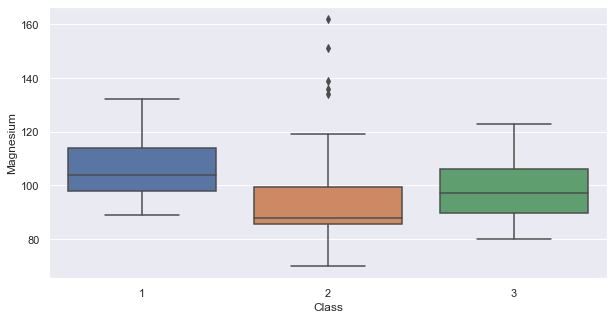

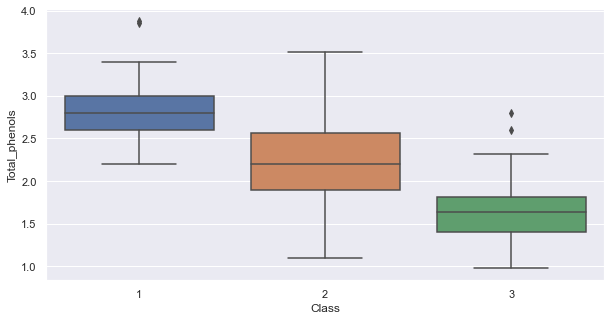

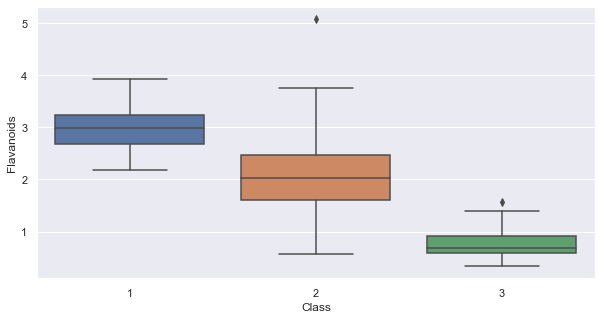

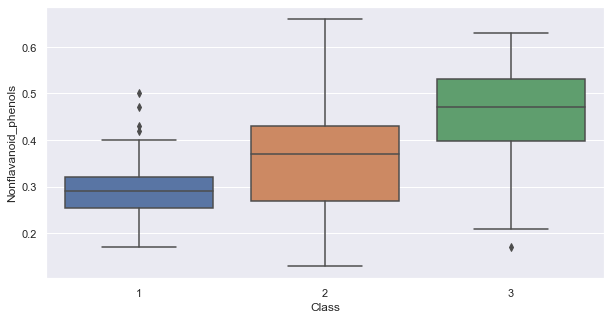

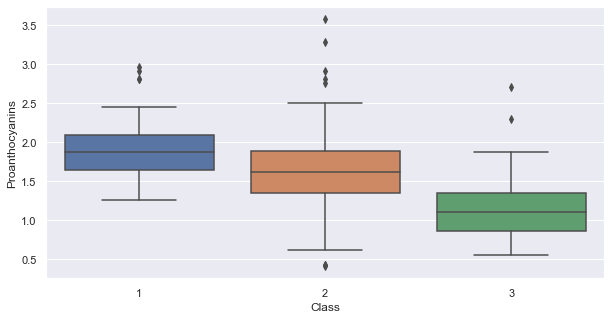

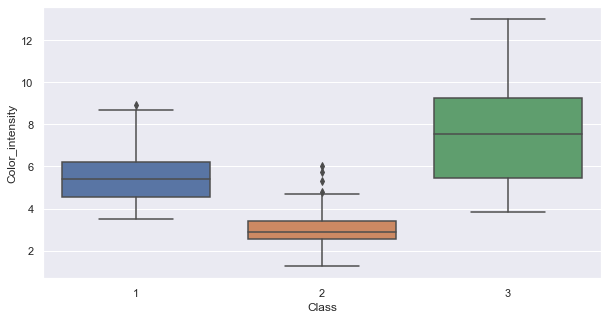

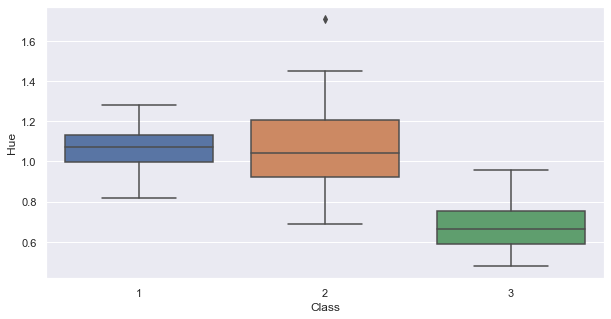

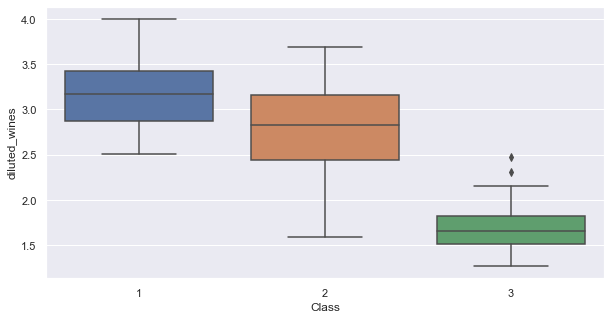

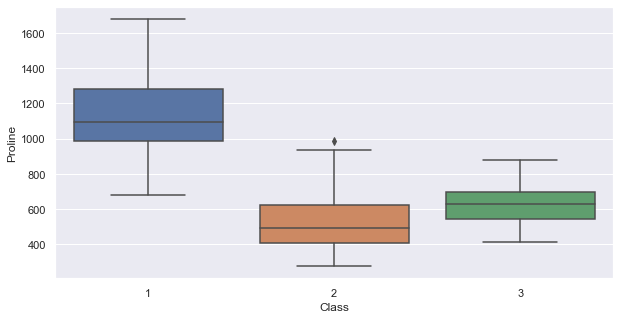

In [41]:
for col in df.drop(['Class'],axis=1).columns:
    sns.boxplot(x = 'Class', y = col, data=df)
    plt.show()

Observations:

1. In 'Alcohol' Variable:

    1a. It looks like wines with higher alcohol content(above 13.5) are rated as Class 1.
    
    1b. Wines with low alcohol(less than 12.5) content are rated as class 2.
    
    1c. Wines with moderate alcohol content(between 12.75 to 13.5) is mostly rated as class 3.
    
    
2. malic_acid:

    2a. Higher malic_acid content is rated as Class3. 
    
    2b. If the malic_acid content is between 1.75 and 2, it is rated as Class 1.
    

3. Alcalinity_of_ash and Nonflavanoid_phenols shows a positive linearity:
    
    3a. The lowest Alcalinity_of_ash level is rated as Class 1, 
    
    3b. moderate Alcalinity_of_ash level as Class 2 and 
    
    3c. higher Alcalinity_of_ash level as Class 3
    

4. Total_phenols, flavanoids, proanthocyanins and diluted_wines show a negative linearity:

    If there are Higher total phenols content in the wine it is classified as Class 1 and the lowest is Classified as Class 3.
    
    
5. If the color_intensity is high the wine is classified as Class 3. Moderate levels of color_intentsity between 4.5 to 6 are classified as Class 1


6. Wines with lower Hue measure is classified as Class 3.

7. Wines with higher Proline levels are classified as class 1.

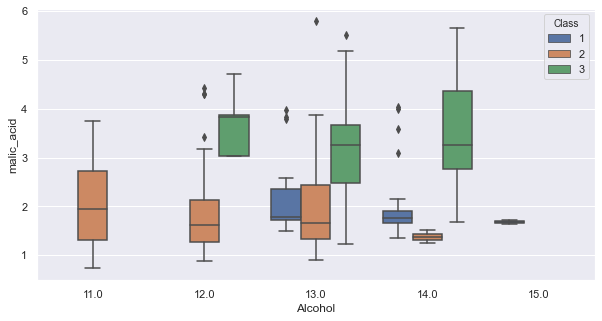

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x = round(df['Alcohol']), y = 'malic_acid', hue = 'Class',data=df)


Observations:

1. In Wines with alcohol content >= 12%, if the malic_acid level is higher, the wine is classified as Class 3

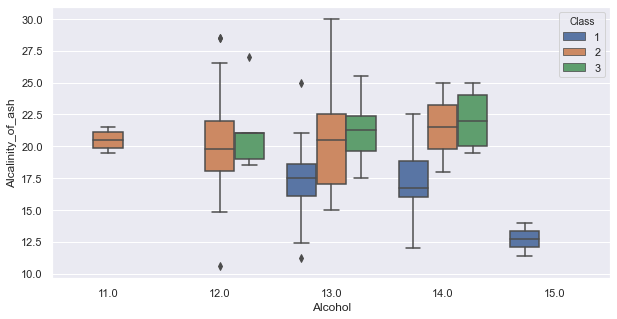

In [43]:

plt.figure(figsize=(10,5))
sns.boxplot(x = round(df['Alcohol']), y = 'Alcalinity_of_ash', hue = 'Class',data=df)


Observations:

1. In Wines with alcohol content >= 14%, if the Alcalinity_of_ash level is higher, the wine is classified as Class 3
2. For wines with alcohol 15%, the Alcalinity_of_ash level seem to decrease.

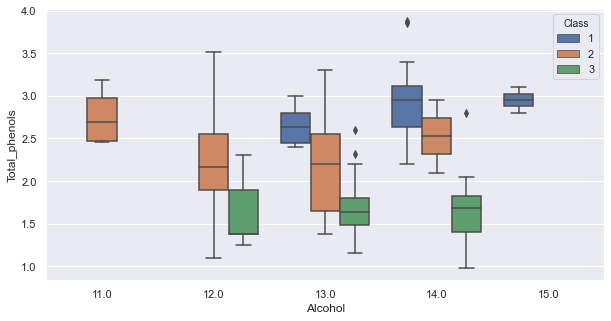

In [44]:

plt.figure(figsize=(10,5))
sns.boxplot(x = round(df['Alcohol']), y = 'Total_phenols', hue = 'Class',data=df)

Observations:

If the Total phenols are higher the wine seem to be classified as Class 1 at all alcohol level.

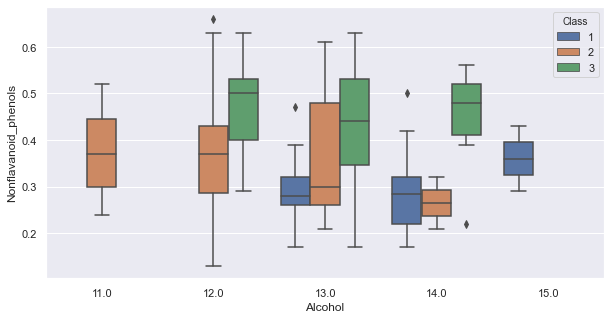

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(x = round(df['Alcohol']), y = 'Nonflavanoid_phenols', hue = 'Class',data=df)

Observations:

1. It looks like higher Nonflavanoid_phenols contents(> approx 0.325) at alcohol level 15% seem to be classified as Class 1 whereas the same level of Nonflavanoid_phenols at alcohol < 15% are classified as Class 2 or 3.

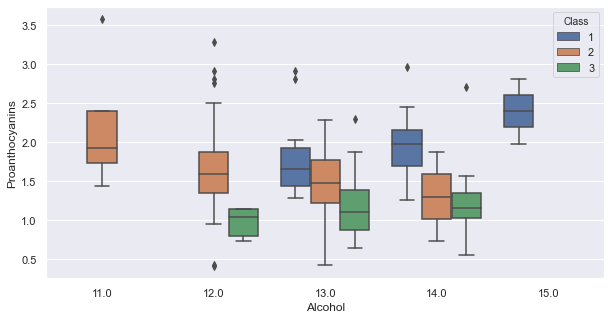

In [46]:
plt.figure(figsize=(10,5))
sns.boxplot(x = round(df['Alcohol']), y = 'Proanthocyanins', hue = 'Class',data=df)

Observations:

1. The trend here shows that if the Proanthocyanins level increase as the alcohol content increases, the wine is classified as Class 1

### Outliers

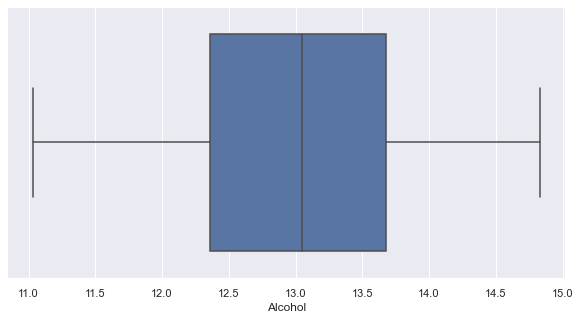

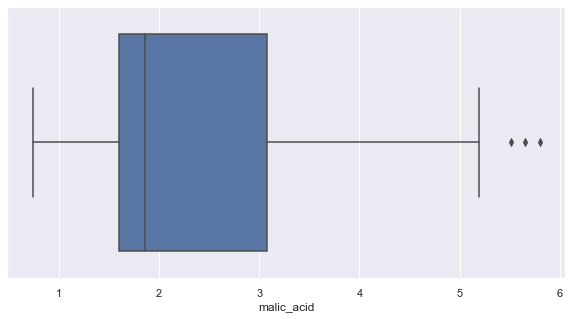

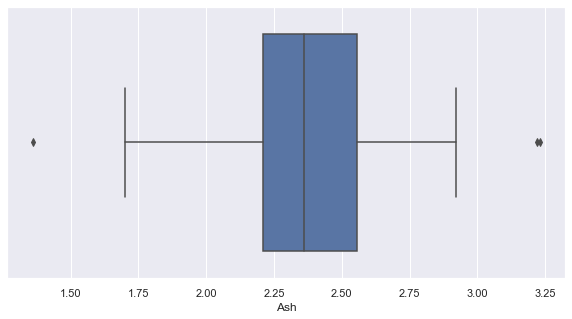

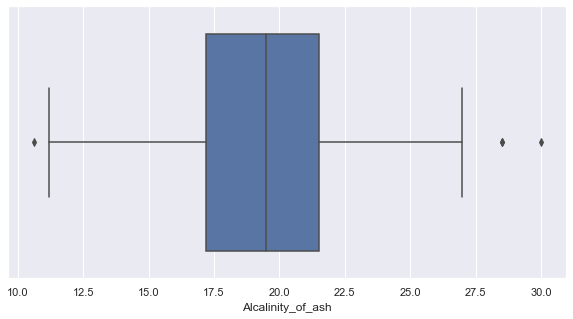

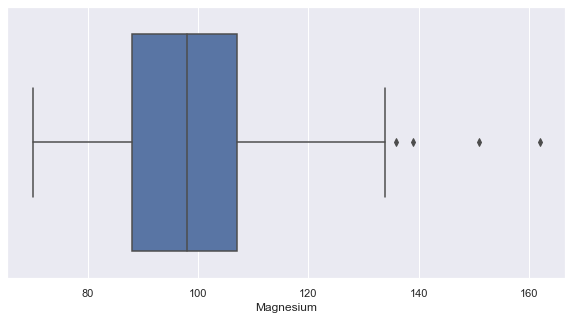

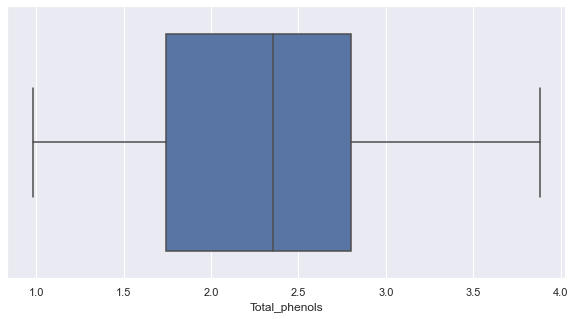

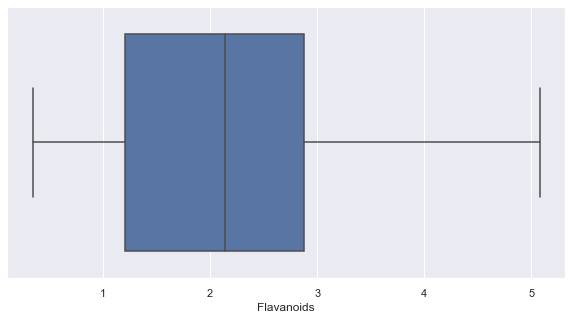

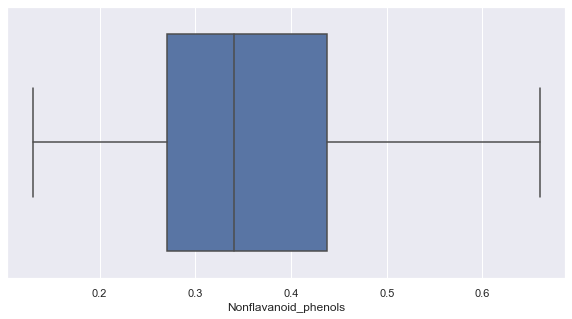

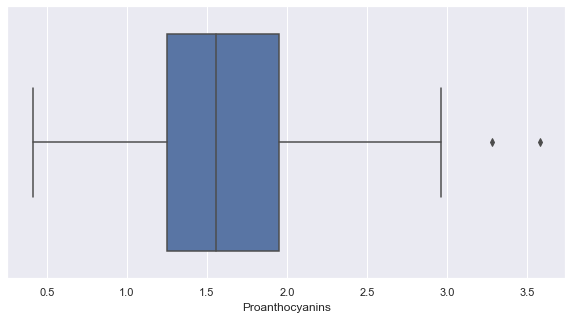

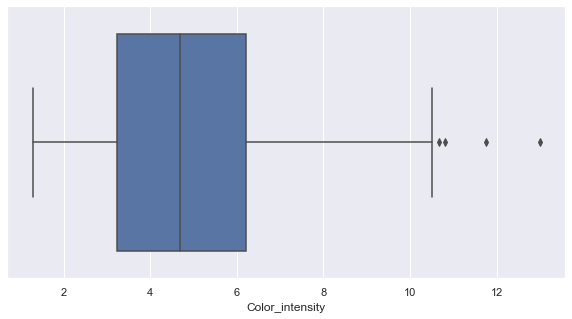

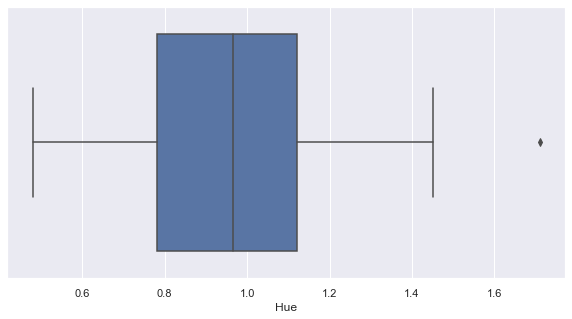

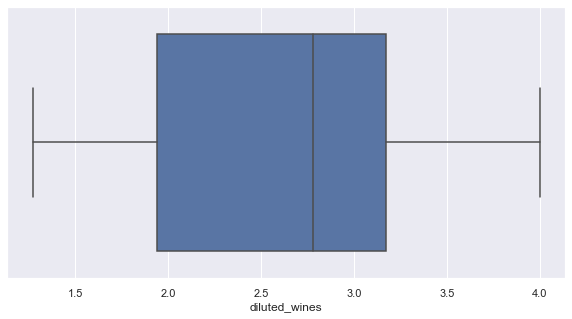

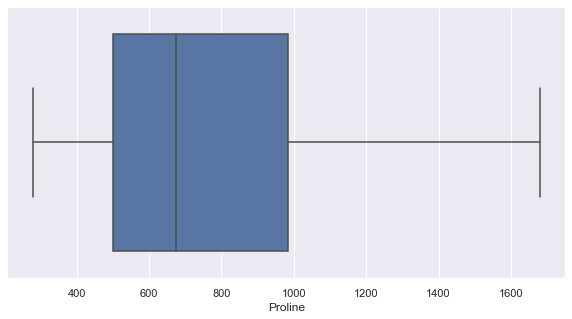

In [47]:
for col in df.drop(['Class'],axis=1).columns:
    sns.boxplot(df[col])
    plt.show()

Observations:

The following variables have outliers:
    1. malic_acid
    2. Ash
    3. Alcalinity_of_ash
    4. Magnesium
    5. Proanthocyanins
    6. Color_intensity
    7. Hue
    
 We can handle the outliers in the later part of this analysis

### Correlation

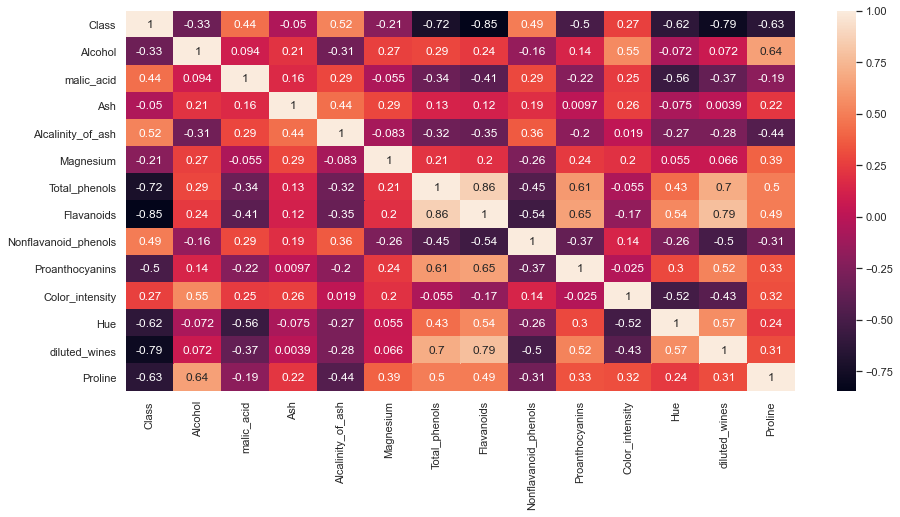

In [48]:
corr = df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

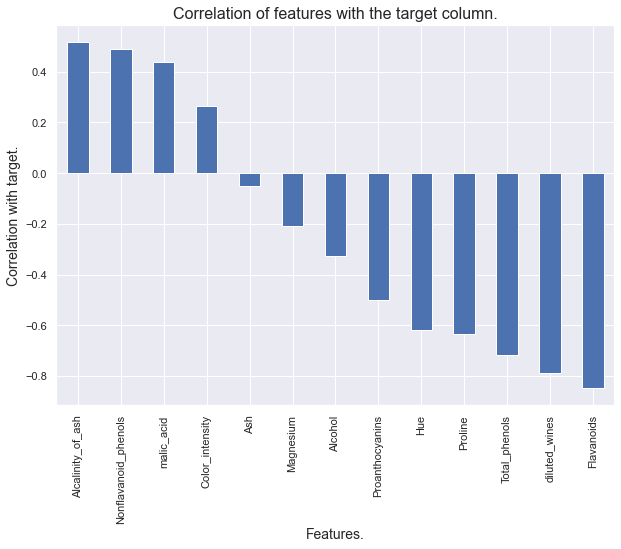

In [49]:
plt.figure(figsize=(10,7))
corr['Class'].sort_values(ascending=False).drop(['Class']).plot(kind='bar')
plt.title('Correlation of features with the target column.',fontsize = 16)
plt.xlabel('Features.',fontsize = 14)
plt.ylabel('Correlation with target.',fontsize = 14)
plt.show()

Observations:

The following variables show positive correlation with target 'Class':
    1. malic_acid - 44%
    2. Alcalinity_of_ash - 52%
    3. Nonflavanoid_phenols - 49%
    4. Color_intensity - 27%

The following variables show negative correlation with target 'Class':
    1. Alcohol - -33%
    2. Ash - -5%
    3. Magnesium - -21%
    4. Total_phenols - -72%
    5. flavanoids - -85%
    6. Proanthocyanins - -50%
    7. Hue- -62%
    8. diluted_wines - -79%
    9. Proline - -63%
    
Since Ash and Magnesium have low negative correlation and the other variables show most of the correlations, we can drop the Ash and Magnesium variables.

In [52]:
new_df = df.drop(['Ash','Magnesium'], axis=1)
new_df

,Class,Alcohol,malic_acid,Alcalinity_of_ash,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,diluted_wines,Proline
0,1,14.23,1.71,15.6,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,11.2,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,18.6,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,16.8,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,21.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,20.5,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,23.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,20.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,20.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Handling Outliers

Using zscores

In [62]:
z_scores = np.abs(zscore(new_df))
filter_df = (z_scores < 3).all(axis=1)
new_df_z = new_df[filter_df]
print(f'New df shape: {new_df_z.shape}, Old df shape: {new_df.shape}')
print(f'Total lose of data is {(new_df.shape[0]-new_df_z.shape[0])/new_df.shape[0]*100} %')

New df shape: (172, 12), Old df shape: (178, 12)
Total lose of data is 3.3707865168539324 %


Using LocalOutlierFactor

In [63]:
lof = LocalOutlierFactor()
lof_preds = lof.fit_predict(new_df)
# select all rows that are not outliers
new_df_LOF = new_df[lof_preds != -1]
print(f'New df shape: {new_df_LOF.shape}, Old df shape: {new_df.shape}')
print(f'Total lose of data is {(new_df.shape[0]-new_df_LOF.shape[0])/new_df.shape[0]*100} %')

New df shape: (172, 12), Old df shape: (178, 12)
Total lose of data is 3.3707865168539324 %


Both methods lose the same amount of data. Lets use LocalOutlierFactor so that it will be useful while creating a pipeline

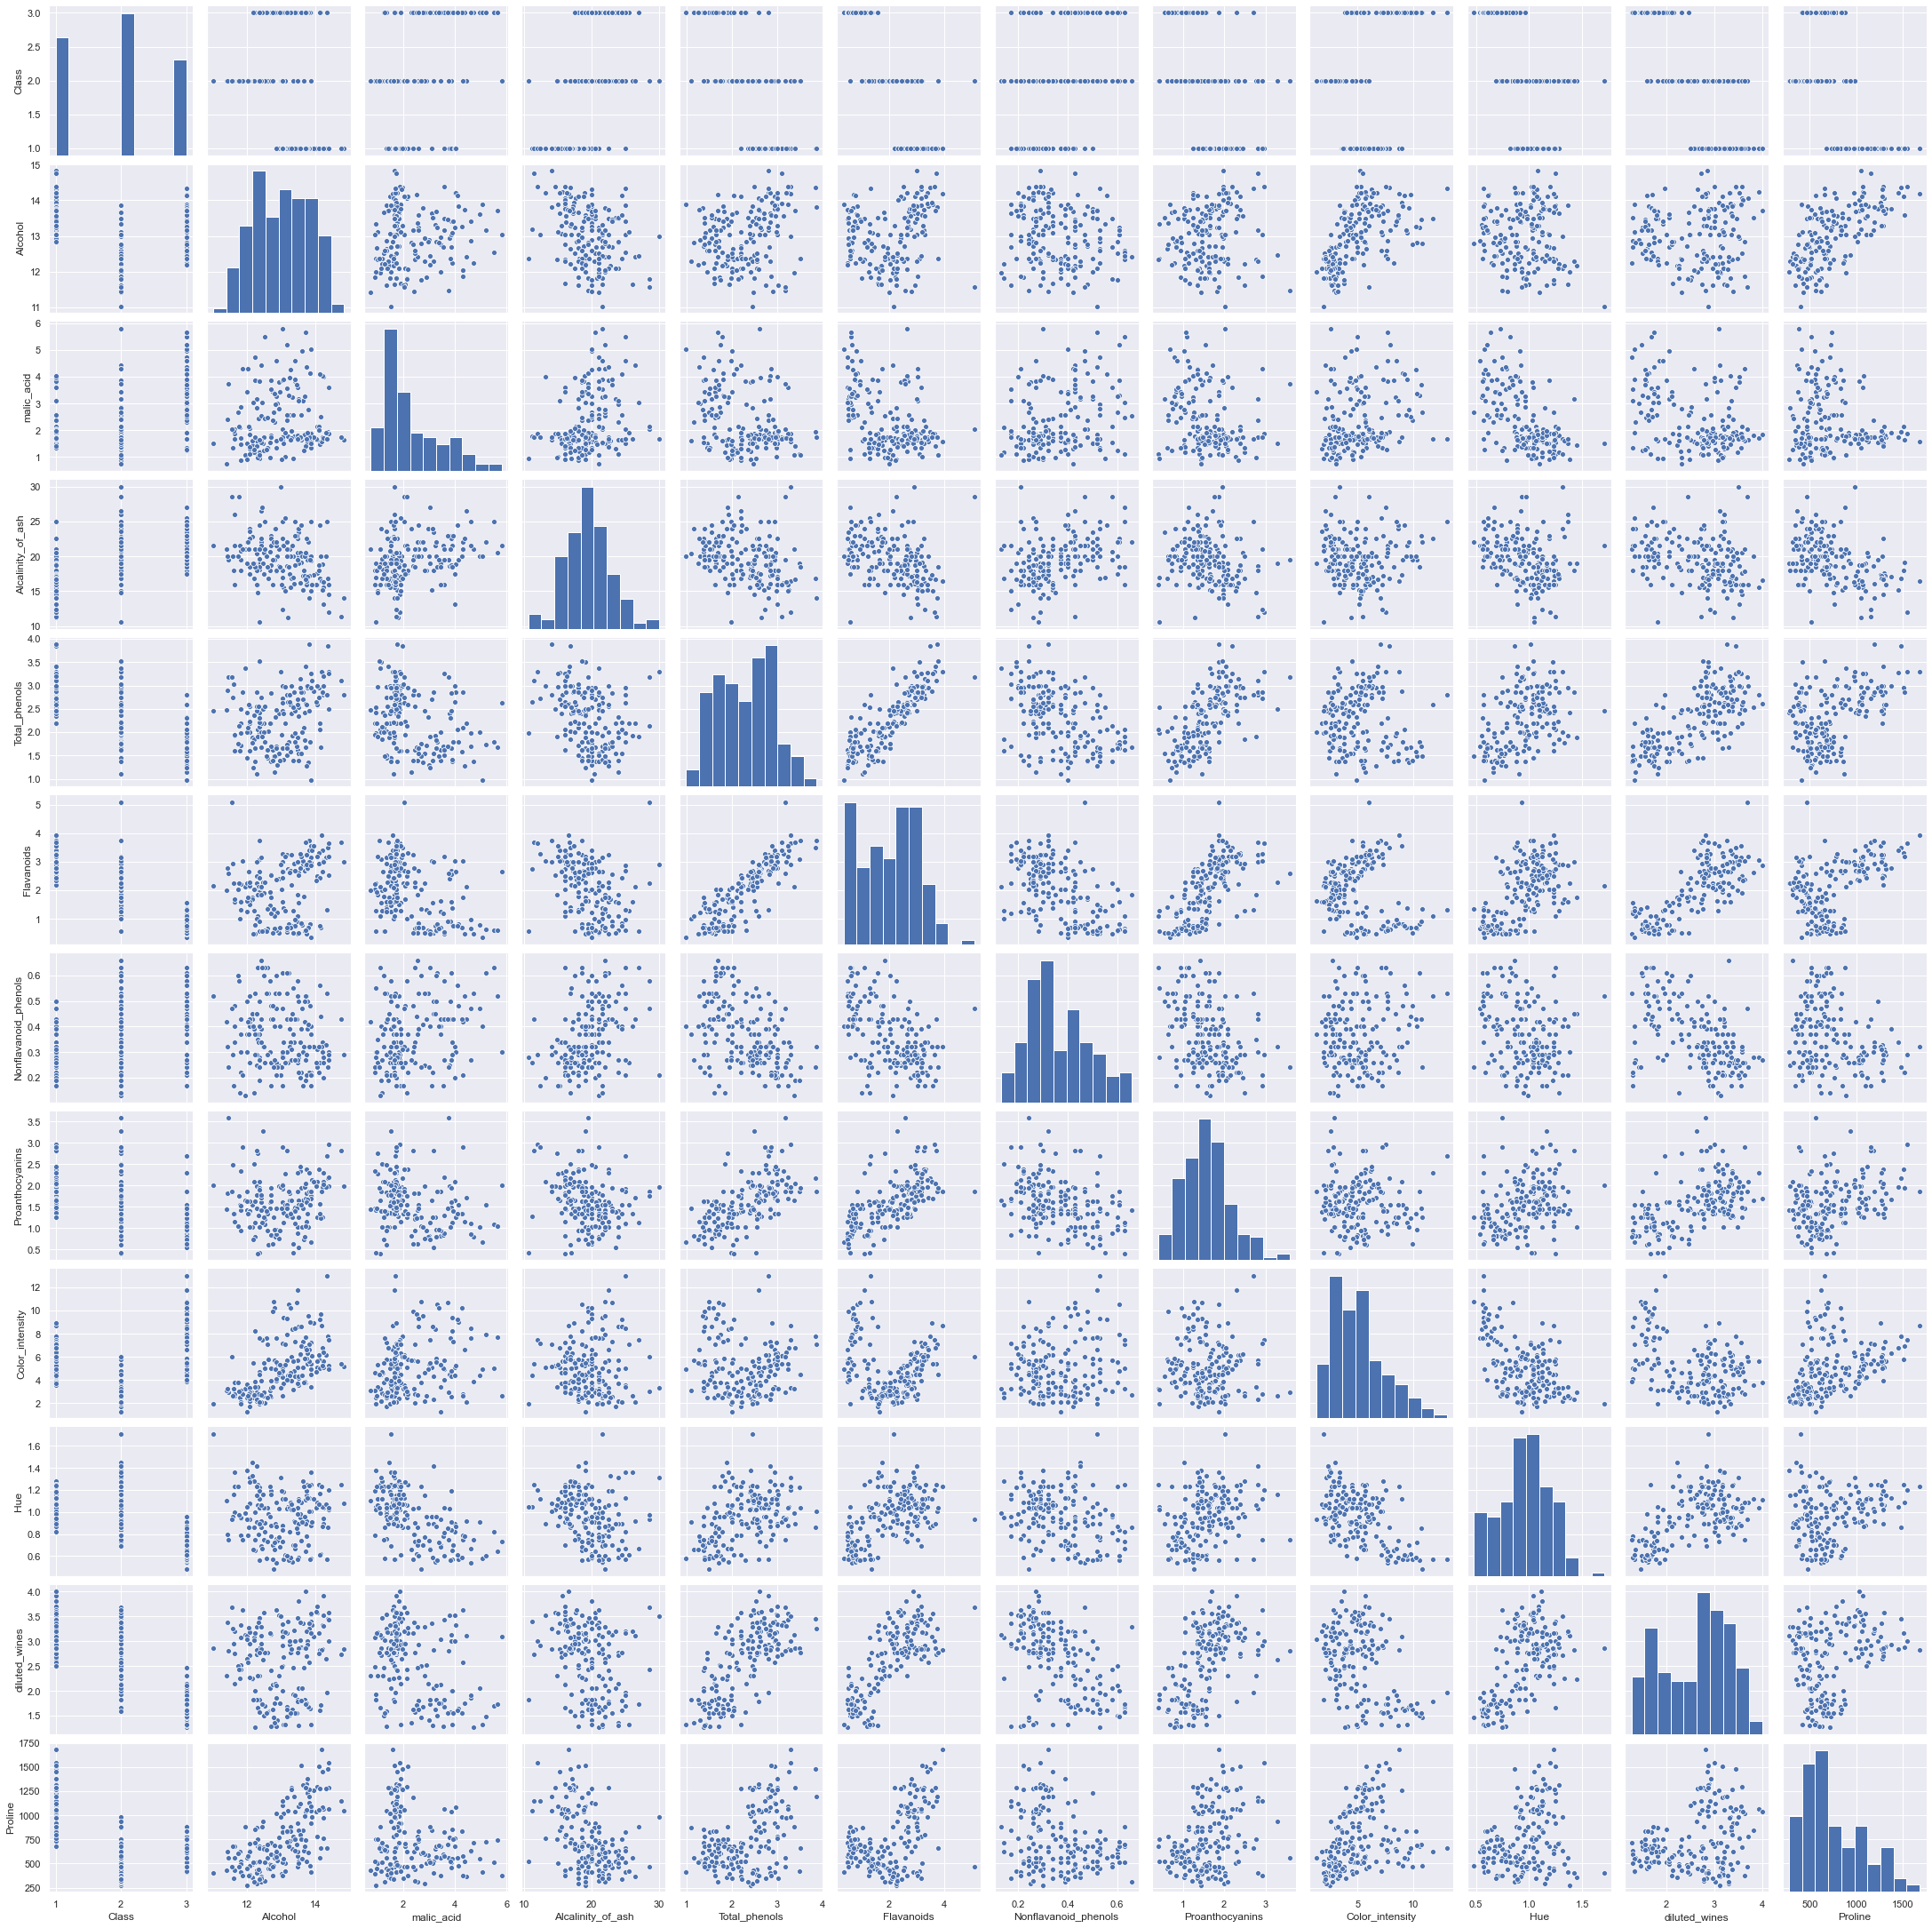

In [64]:
sns.pairplot(new_df)

Observations:

Many of the predictor variables are showing a Generalized linear relationship with the target variable. Hence a Generalized linear model like LogisticRegression may work well for this data.

### Standardizing the data

In [66]:
X = new_df_LOF.drop(['Class'], axis=1)
y = new_df_LOF['Class']

In [77]:
pt = PowerTransformer(standardize=False)
X_pt = pt.fit_transform(X)
X_pt_df = pd.DataFrame(data=X_pt, columns = X.columns)
pt1 = PowerTransformer()
X_pt1 = pt1.fit_transform(X)
X_pt_df1 = pd.DataFrame(data=X_pt1, columns = X.columns)

### Splitting Train and test data

Lets find the optimum random state for splitting the data

In [89]:
f1score = []
f1test=[]
f1train = []
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(X_pt_df, y, stratify = y, test_size = 0.20, random_state = i)
    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_train_preds = model.predict(x_train)
    y_preds = model.predict(x_test)
    f1_test = round(f1_score(y_test, y_preds, average = 'micro')*100,2)
    f1test.append(f1_test)
    f1_train = round(f1_score(y_train, y_train_preds, average = 'micro')*100,2)
    f1train.append(f1_train)
    if f1_test == f1_train:
        f1score.append(f1_score(y_test, y_preds,average = 'micro'))
        
try:
    rand_state=f1score.index(max(f1score))
    print(f'The random_state = {rand_state} gives the best performance with a F1 score of {f1score[rand_state]} for Train and test.')
except:
    rand_state = f1test.index(max(f1test))
    print(f'The random_state = {rand_state} gives the best performance with a F1 score of {f1test[rand_state]} on test and {f1train[rand_state]} on train.')
        


The random_state = 3 gives the best performance with a F1 score of 100.0 on test and 95.62 on train.


Data without DataTransformation : The random_state = 4 gives the best performance with a F1 score of 100.0 on test and 96.35 on train.

Data with DataTransformation and not standardized : The random_state = 3 gives the best performance with a F1 score of 100.0 on test and 95.62 on train.

Data with DataTransformation and standardized : The random_state = 0 gives the best performance with a F1 score of 1.0 for Train and test.

As expected the scores are pretty high. We expected this in the EDA itself where we observed that most of the variables were showing good distinction between the Classes in the target variable.

1. When I used the standardized dataset It gives me a Training dataset f1_score of 1. -> "The random_state = 0 gives the best performance with a F1 score of 1.0 for Train and test."

2. In am effort to avoid overfitting, I am going to use the non-standardized training dataset instead of standardized dataset.

3. Although 'Data without DataTransformation' gives slightly higher f1 score than 'Data with DataTransformation and not Standardized', I am going to use the Transformed data since some models require data to be near Gaussian distribution.

4. So, X_pt_df will be used as the independent variables set

5. Train and test split will use Random state = 3

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X_pt_df, y, stratify = y, test_size = 0.20, random_state = 3)

## Finding the suitable model

In [161]:
models = [DecisionTreeClassifier(), SVC(), KNeighborsClassifier(), RandomForestClassifier(), LogisticRegression(), SGDClassifier(), GaussianNB()]
tr_scores = []
tst_scores = []
variance = []
model_time = []
for model in models:
    mod = model
    mod.fit(x_train, y_train)
    start_time = time.clock()
    y_preds = mod.predict(x_test)
    end_time = time.clock()
    train_scores = f1_score(y_train, mod.predict(x_train), average = 'micro')
    tr_scores.append(train_scores)
    test_scores = f1_score(y_test, y_preds, average = 'micro')
    tst_scores.append(test_scores)
    var = np.abs(train_scores - test_scores)
    variance.append(var)
    t = end_time - start_time
    model_time.append(t)
    print(f'\n{mod.__class__.__name__}')
    print(f'Training data score: {train_scores}')
    print(f'Testing data score: {test_scores}')
    print(f'Variance between train and test scores: {var}')
    print(f'Prediction time taken: {t} s')
    print('*'*20)


DecisionTreeClassifier
Training data score: 1.0
Testing data score: 0.9714285714285714
Variance between train and test scores: 0.02857142857142858
Prediction time taken: 0.0006962000006751623 s
********************

SVC
Training data score: 0.9124087591240876
Testing data score: 1.0
Variance between train and test scores: 0.08759124087591241
Prediction time taken: 0.000620599999820115 s
********************

KNeighborsClassifier
Training data score: 0.927007299270073
Testing data score: 0.9714285714285714
Variance between train and test scores: 0.04442127215849845
Prediction time taken: 0.00231300000086776 s
********************

RandomForestClassifier
Training data score: 1.0
Testing data score: 1.0
Variance between train and test scores: 0.0
Prediction time taken: 0.007898500000010245 s
********************

LogisticRegression
Training data score: 0.9562043795620438
Testing data score: 1.0
Variance between train and test scores: 0.04379562043795615
Prediction time taken: 0.000514199

### Plotting train and test scores and Variance

Text(0.5, 1.0, 'Plotting ')

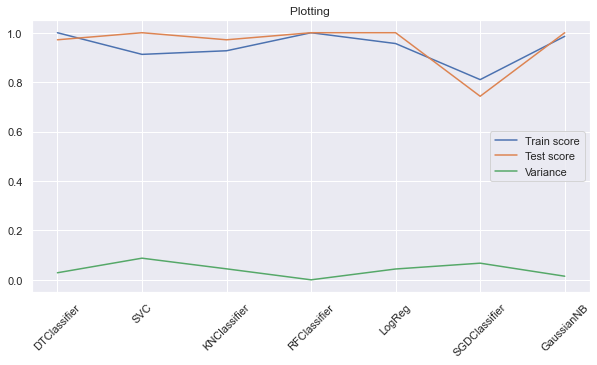

In [163]:
cols = ['DTClassifier', 'SVC', 'KNClassifier', 'RFClassifier', 'LogReg', 'SGDClassifier', 'GaussianNB']
plt.plot(pd.Series(tr_scores, index = cols))
plt.plot(pd.Series(tst_scores, index = cols))
plt.plot(pd.Series(variance, index = cols))

plt.xticks(rotation=45)
plt.legend(['Train score','Test score','Variance'])
plt.title('Plotting ')

Observations:

1. All the models are performing well.
2. Some models are showing some variance although there is only low variance.

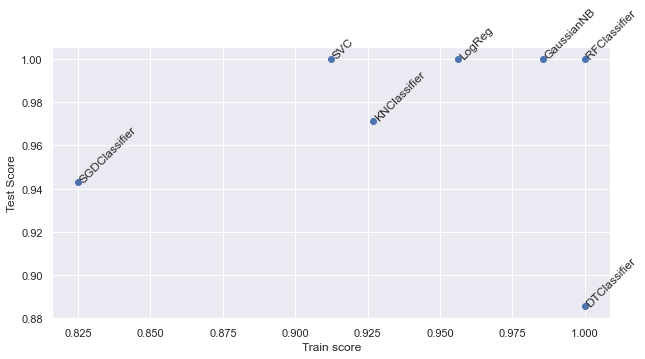

In [128]:
fig, ax = plt.subplots()
ax.scatter(tr_scores, tst_scores)
plt.xlabel('Train score')
plt.ylabel('Test Score')

for i, txt in enumerate(cols):
    ax.annotate(txt, (tr_scores[i], tst_scores[i]), rotation=45)

As expected all models are performing well since there is a natural distinction between the classes in target variable for most of the independent variables.

The best models are:
1. Random Forest Classifier
2. GaussianNB and
3. Logistic Regression

In [ ]:
models[model_time.index(min(model_time))].__class__.__name__,min(model_time)

In [ ]:
models.index()

In [188]:
models[model_time.index(min(model_time))].__class__.__name__,min(model_time)

('LogisticRegression', 0.000514199999088305)

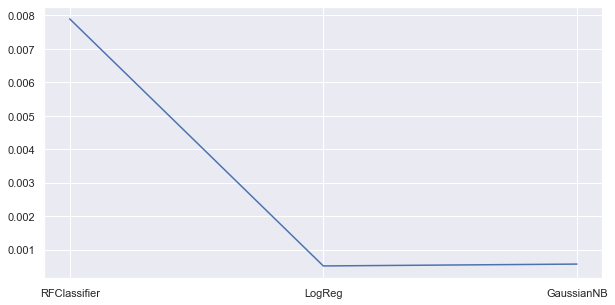

In [182]:
plt.plot(pd.DataFrame(model_time, index = cols).loc[['RFClassifier','LogReg','GaussianNB'],:])

In [181]:
pd.DataFrame(model_time, index = cols).loc[['RFClassifier','LogReg','GaussianNB'],:]

,0
RFClassifier,0.007899
LogReg,0.000514
GaussianNB,0.000570


In [151]:
end_time = time.clock()

In [152]:
round(end_time - start_time, 2)

2.03

In [144]:
time.clock()

8308.6857343

In [160]:
top_models = [RandomForestClassifier(), LogisticRegression(), GaussianNB()]
trainl_scores = []
testl_scores = []
model_time = []
for model in top_models:
    mod = model
    mod.fit(x_train, y_train)
    start_time = time.clock()
    y_preds = mod.predict(x_test)
    end_time = time.clock()
    train_scores = f1_score(y_train, mod.predict(x_train), average = 'micro')
    tr_scores.append(train_scores)
    test_scores = f1_score(y_test, y_preds, average = 'micro')
    tst_scores.append(test_scores)
    t = end_time - start_time
    model_time.append(t)
    print(f'\n{mod.__class__.__name__}')
    print(f'Training data score: {train_scores}')
    print(f'Testing data score: {test_scores}')
    print(f'Prediction time taken: {t} s')
    print('*'*20)


RandomForestClassifier
Training data score: 1.0
Testing data score: 1.0
Prediction time taken: 0.0080857000011747 s
********************

LogisticRegression
Training data score: 0.9562043795620438
Testing data score: 1.0
Prediction time taken: 0.0005656000012095319 s
********************

GaussianNB
Training data score: 0.9854014598540146
Testing data score: 1.0
Prediction time taken: 0.0005898999988858122 s
********************


In [131]:
from sklearn.model_selection import GridSearchCV
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train, y_train)

gs_NB.best_params_, gs_NB.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.1s finished


({'var_smoothing': 0.0001}, 0.9854497354497355)

In [135]:
gnb = GaussianNB(var_smoothing= 0.0001)
gnb.fit(x_train, y_train)
f1_score(y_test, gnb.predict(x_test), average='macro')

1.0